# Algorithms Exercise 2

## Imports

In [22]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## Peak finding

Write a function `find_peaks` that finds and returns the indices of the local maxima in a sequence. Your function should:

* Properly handle local maxima at the endpoints of the input array.
* Return a Numpy array of integer indices.
* Handle any Python iterable as input.

In [27]:
def find_peaks(a):
    """Find the indices of the local maxima in a sequence."""
    maxima = []
    N = len(a)
    if a[0] > a[1]:
        maxima.append(0)
    for i in range(1, N-1):
        if a[i-1] < a[i] and a[i] > a[i+1]:
            maxima.append(i)
    if a[N-1] > a[N-2]:
        maxima.append(N-1)
    return np.array(maxima)

In [28]:
p1 = find_peaks([2,0,1,0,2,0,1])
assert np.allclose(p1, np.array([0,2,4,6]))
p2 = find_peaks(np.array([0,1,2,3]))
assert np.allclose(p2, np.array([3]))
p3 = find_peaks([3,2,1,0])
assert np.allclose(p3, np.array([0]))

Here is a string with the first 10000 digits of $\pi$ (after the decimal). Write code to perform the following:

* Convert that string to a Numpy array of integers.
* Find the indices of the local maxima in the digits of $\pi$.
* Use `np.diff` to find the distances between consequtive local maxima.
* Visualize that distribution using an appropriately customized histogram.

In [29]:
from sympy import pi, N
from scipy import signal
from scipy.signal import argrelextrema
pi_digits_str = str(N(pi, 10001))[2:]

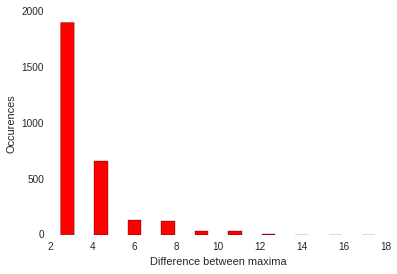

In [36]:
a = np.array(pi_digits_str)
b = [int(i) for i in str(a)]
c = find_peaks(b)
data = np.diff(c)

def remove_spines(axes=None, top=False, right=False):
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    
remove_spines()
plt.hist(data, bins=10, rwidth=0.4, color = 'red')
plt.xlabel('Difference between maxima')
plt.ylabel('Occurences');

In [35]:
assert True # use this for grading the pi digits histogram